In [1]:
import numpy as np
import xarray as xr
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from glob import glob
from matplotlib import pyplot as plt, patches
import matplotlib.colors as colors
import matplotlib.path as mpath
from matplotlib import patches
plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [3]:
grid_files = ["/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc", 
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc",
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_zgr.nc"]

In [5]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)

In [6]:
KE_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-KE" 
                                + "/clim/CREG12.L75-REF08_*.5d_KEclim.nc"))
KE_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-KE" 
                                + "/clim/CREG12.L75-FUT08_*.5d_KEclim.nc"))
MKE_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-MKE" 
                                + "/clim/CREG12.L75-REF08_*.5d_MKEclim.nc"))
MKE_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-MKE" 
                                + "/clim/CREG12.L75-FUT08_*.5d_MKEclim.nc"))
EKE_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-EKE" 
                                + "/clim/CREG12.L75-REF08_*.5d_EKEclim.nc"))
EKE_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-EKE" 
                                + "/clim/CREG12.L75-FUT08_*.5d_EKEclim.nc"))
ICE_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-icemod_clim/" 
                                + "/CREG12.L75-REF08_*.5d_icemodclim.nc"))
ICE_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-icemod_clim/" 
                                + "/CREG12.L75-FUT08_*.5d_icemodclim.nc"))
T_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-T_clim/" 
                                + "/CREG12.L75-REF08_*.5d_gridTclim.nc"))
T_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-T_clim/" 
                                + "/CREG12.L75-FUT08_*.5d_gridTclim.nc"))

In [8]:
KEREF = xr.open_mfdataset(KE_data_filesREF, parallel=True, preprocess=prepro)
KEFUT = xr.open_mfdataset(KE_data_filesFUT, parallel=True, preprocess=prepro)
MKEREF = xr.open_mfdataset(MKE_data_filesREF, parallel=True, preprocess=prepro)
MKEFUT = xr.open_mfdataset(MKE_data_filesFUT, parallel=True, preprocess=prepro)
EKEREF = xr.open_mfdataset(EKE_data_filesREF, parallel=True, preprocess=prepro)
EKEFUT = xr.open_mfdataset(EKE_data_filesFUT, parallel=True, preprocess=prepro)
ICEREF = xr.open_mfdataset(ICE_data_filesREF, parallel=True, preprocess=prepro)
ICEFUT = xr.open_mfdataset(ICE_data_filesFUT, parallel=True, preprocess=prepro)
TREF = xr.open_mfdataset(T_data_filesREF, parallel=True, preprocess=prepro)
TFUT = xr.open_mfdataset(T_data_filesFUT, parallel=True, preprocess=prepro)

In [10]:
max_depth = 1000
lev = grid.nav_lev.where(grid.nav_lev>max_depth).argmin().values
deep_enough = grid.mbathy.where(grid.mbathy>=lev, 0).squeeze().compute()
deep_enough[0:225, :] = 0
deep_enough = deep_enough.assign_coords({"nav_lon": grid.nav_lon, "nav_lat": grid.nav_lat})

In [11]:
def map_config(ax):
    ax.set_extent([-180, 180, 67, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor="silver")
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.invert_yaxis()
    ax.invert_xaxis()

In [12]:
proj = ccrs.NearsidePerspective(central_longitude=170, central_latitude=75, satellite_height=35785831)

In [13]:
KEREFw = KEREF.voke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
KEFUTw = KEFUT.voke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
MKEREFw = MKEREF.vomke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
MKEFUTw = MKEFUT.vomke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
EKEREFw = EKEREF.voeke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
EKEFUTw = EKEFUT.voeke.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
ICEREFw = ICEREF.sithic.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
ICEFUTw = ICEFUT.sithic.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
MLDREFw = TREF.mldr10_1.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
MLDFUTw = TFUT.mldr10_1.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()

In [15]:
tot_area = (grid.e1t.squeeze().where(deep_enough!=0) 
            * grid.e2t.squeeze().where(deep_enough!=0)).sum(skipna=True)
tot_vol = (grid.e1t.squeeze().where(deep_enough!=0) 
           * grid.e2t.squeeze().where(deep_enough!=0)
           * grid.e3t_0.squeeze().where(deep_enough!=0)).sum(skipna=True)

In [16]:
KEREF_int = (KEREFw.sum(("x", "y"), skipna=True) / tot_area).compute()
KEFUT_int = (KEFUTw.sum(("x", "y"), skipna=True) / tot_area).compute()
MKEREF_int = (MKEREFw.sum(("x", "y"), skipna=True) / tot_area).compute()
MKEFUT_int = (MKEFUTw.sum(("x", "y"), skipna=True) / tot_area).compute()
EKEREF_int = (EKEREFw.sum(("x", "y"), skipna=True) / tot_area).compute()
EKEFUT_int = (EKEFUTw.sum(("x", "y"), skipna=True) / tot_area).compute()
ICEREF_int = (ICEREFw.sum(("x", "y"), skipna=True) / tot_area).compute()
ICEFUT_int = (ICEFUTw.sum(("x", "y"), skipna=True) / tot_area).compute()
MLDREF_int = (MLDREFw.sum(("x", "y"), skipna=True) / tot_area).compute()
MLDFUT_int = (MLDFUTw.sum(("x", "y"), skipna=True) / tot_area).compute()

In [18]:
for ds in [KEREF_int, KEFUT_int, MKEREF_int, MKEFUT_int, EKEREF_int, EKEFUT_int,
           ICEREF_int, ICEFUT_int, MLDREF_int, MLDFUT_int]:
    if "time_counter" in ds.dims:
        ds["t_index"] = ("time_counter", np.arange(0, len(ds.time_counter)))

In [19]:
z_max = 37
t_len = len(KEREF.time_counter)

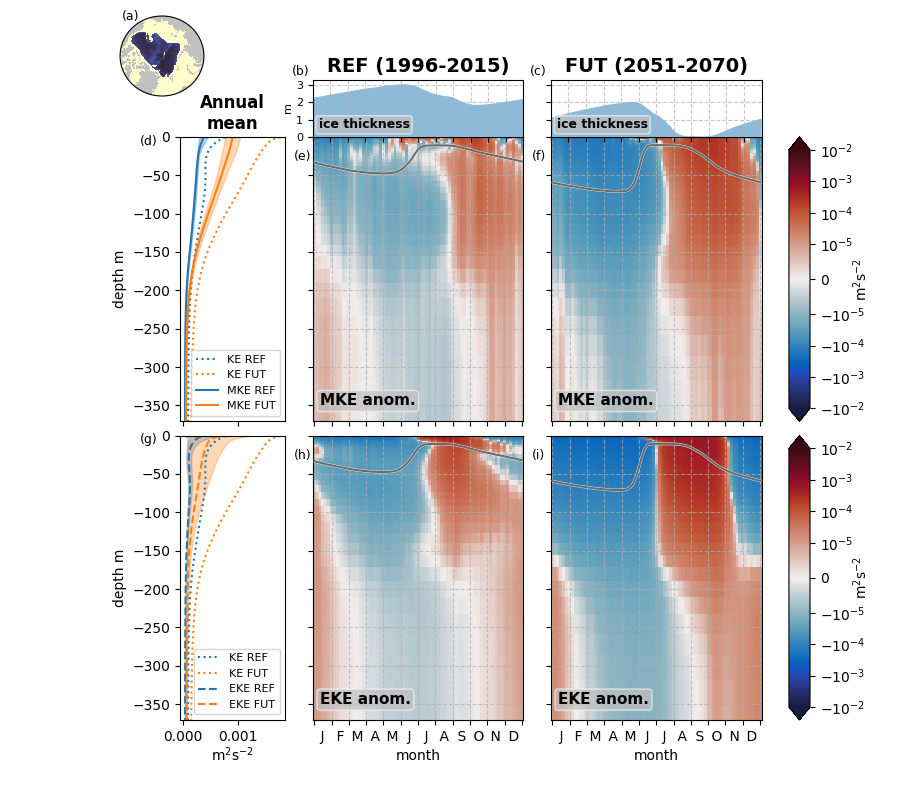

In [199]:
fig = plt.figure(figsize=(8, 7))
gs = fig.add_gridspec(4, 4, width_ratios=[0.5, 1, 1, 0.1], height_ratios=[0.2, 1, 0.05, 1])

################# plot profiles of KE, MKE, EKE #####################################

pro1 = fig.add_subplot(gs[1, 0])
pro2 = fig.add_subplot(gs[3, 0])

pro1.plot(KEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -KEREF_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:blue", linestyle=":", label="KE REF")
pro1.plot(KEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -KEFUT_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:orange", linestyle=":", label="KE FUT")
pro1.plot(MKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -MKEREF_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:blue", linestyle="-", label="MKE REF")
pro1.fill_betweenx(-MKEREF_int.deptht.isel(deptht=slice(0, z_max)),
                   MKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   - MKEREF_int.std("time_counter").isel(deptht=slice(0, z_max)),
                   MKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   + MKEREF_int.std("time_counter").isel(deptht=slice(0, z_max)), 
                   color="tab:blue", alpha=0.3)
pro1.plot(MKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -MKEFUT_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:orange", linestyle="-", label="MKE FUT")
pro1.fill_betweenx(-MKEFUT_int.deptht.isel(deptht=slice(0, z_max)),
                   MKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   - MKEFUT_int.std("time_counter").isel(deptht=slice(0, z_max)),
                   MKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   + MKEFUT_int.std("time_counter").isel(deptht=slice(0, z_max)), 
                   color="tab:orange", alpha=0.3)

pro2.plot(KEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -KEREF_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:blue", linestyle=":", label="KE REF")
pro2.plot(KEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -KEFUT_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:orange", linestyle=":", label="KE FUT")
pro2.plot(EKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -EKEREF_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:blue", linestyle="--", label="EKE REF")
pro2.fill_betweenx(-EKEREF_int.deptht.isel(deptht=slice(0, z_max)),
                   EKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   - EKEREF_int.std("time_counter").isel(deptht=slice(0, z_max)),
                   EKEREF_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   + EKEREF_int.std("time_counter").isel(deptht=slice(0, z_max)), 
                   color="tab:blue", alpha=0.3)
pro2.plot(EKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)), 
          -EKEFUT_int.deptht.isel(deptht=slice(0, z_max)), 
          color="tab:orange", linestyle="--", label="EKE FUT")
pro2.fill_betweenx(-EKEFUT_int.deptht.isel(deptht=slice(0, z_max)),
                   EKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   - EKEFUT_int.std("time_counter").isel(deptht=slice(0, z_max)),
                   EKEFUT_int.mean("time_counter").isel(deptht=slice(0, z_max)) 
                   + EKEFUT_int.std("time_counter").isel(deptht=slice(0, z_max)), 
                   color="tab:orange", alpha=0.3)
#pro2.plot(N2REF_int.mean("time_counter").isel(deptht=slice(0, z_max)) * 10, 
#          -N2REF_int.deptht.isel(deptht=slice(0, z_max)), 
#          color="tab:red", linestyle="-", label=r"N$^{2}$ REF")
#pro2.plot(N2FUT_int.mean("time_counter").isel(deptht=slice(0, z_max)) * 10, 
#          -N2FUT_int.deptht.isel(deptht=slice(0, z_max)), 
#          color="tab:red", linestyle="--", label=r"N$^{2}$ FUT")

############ plot seasonal cycles onf MKE #############################################

mke1 = fig.add_subplot(gs[1, 1])
mke2 = fig.add_subplot(gs[1, 2])

sm1 = (MKEREF_int - MKEREF_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=mke1, cmap=cmo.balance, 
       norm=colors.SymLogNorm(linthresh=1.01e-5, linscale=1, vmin=-1e-2, vmax=1e-2), add_colorbar=False)
sm2 = (MKEFUT_int - MKEFUT_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=mke2, cmap=cmo.balance, 
       norm=colors.SymLogNorm(linthresh=1.01e-5, linscale=1, vmin=-1e-2, vmax=1e-2), add_colorbar=False)

sm10 = (MKEREF_int - MKEREF_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot.contour(
       x="t_index", y="deptht", yincrease=False, ax=mke1, colors="dimgray", levels=[0], linewidths=1, linestyles=":")
sm20 = (MKEFUT_int - MKEFUT_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot.contour(
       x="t_index", y="deptht", yincrease=False, ax=mke2, colors="dimgray", levels=[0], linewidths=1, linestyles=":")

ml11 = MLDREF_int.plot(x="t_index", ax=mke1, color="snow", linewidth=2, zorder=2)
ml12 = MLDREF_int.plot(x="t_index", ax=mke1, color="black", zorder=3)

ml21 = MLDFUT_int.plot(x="t_index", ax=mke2, color="snow", linewidth=2, zorder=2)
ml22 = MLDFUT_int.plot(x="t_index", ax=mke2, color="black", zorder=3)

##################### plot seasonal cycles of EKE #######################################################

eke1 = fig.add_subplot(gs[3, 1])
eke2 = fig.add_subplot(gs[3, 2])

se1 = (EKEREF_int - EKEREF_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=eke1, cmap=cmo.balance, 
       norm=colors.SymLogNorm(linthresh=1.01e-5, linscale=1, vmin=-1e-2, vmax=1e-2), add_colorbar=False)
se2 = (EKEFUT_int - EKEFUT_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=eke2, cmap=cmo.balance, 
       norm=colors.SymLogNorm(linthresh=1.01e-5, linscale=1, vmin=-1e-2, vmax=1e-2), add_colorbar=False)

se10 = (EKEREF_int - EKEREF_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot.contour(
       x="t_index", y="deptht", yincrease=False, ax=eke1, colors="dimgray", levels=[0], linewidths=1, linestyles=":")
se20 = (EKEFUT_int - EKEFUT_int.mean("time_counter")).isel(deptht=slice(0, z_max)).plot.contour(
       x="t_index", y="deptht", yincrease=False, ax=eke2, colors="dimgray", levels=[0], linewidths=1, linestyles=":")

ml11 = MLDREF_int.plot(x="t_index", ax=eke1, color="snow", linewidth=2, zorder=2)
ml12 = MLDREF_int.plot(x="t_index", ax=eke1, color="black", zorder=3)

ml21 = MLDFUT_int.plot(x="t_index", ax=eke2, color="snow", linewidth=2, zorder=2)
ml22 = MLDFUT_int.plot(x="t_index", ax=eke2, color="black", zorder=3)

######################## plot sea ice thickness ################################################

ice1 = fig.add_subplot(gs[0, 1])
ice2 = fig.add_subplot(gs[0, 2])

ice1.fill_between(EKEREF_int.t_index, ICEREF_int * 0., ICEREF_int, alpha=0.5)
ice2.fill_between(EKEFUT_int.t_index, ICEFUT_int * 0., ICEFUT_int, alpha=0.5)

######################## add colorbars #####################################################

cax1 = fig.add_subplot(gs[1, 3])
cax2 = fig.add_subplot(gs[3, 3])

cb1 = plt.colorbar(sm1, cax=cax1, orientation="vertical", extend="both")
cax1.set_ylabel(r"m$^{2}$s$^{-2}$", labelpad=-10)
cb2 = plt.colorbar(se1, cax=cax2, orientation="vertical", extend="both")
cax2.set_ylabel(r"m$^{2}$s$^{-2}$", labelpad=-10)

####################### add inset showing the region considered ##############################

ax_inset = plt.axes([0.09, 0.85, 0.13, 0.13], projection=proj)
(deep_enough).where(grid.mbathy!=0).plot(x='nav_lon', y='nav_lat', ax=ax_inset, cmap=cmo.deep, 
                                         transform=ccrs.PlateCarree(), 
                                         add_colorbar=False)
ax_inset.set_facecolor("silver")
map_config(ax_inset)

####################### add labels, ticks, etc. ##############################################

[ax.legend(fontsize=8) for ax in [pro1, pro2]]
[ax.set_ylim(-KEREF_int.deptht.isel(deptht=z_max-1).values, 0) for ax in [pro1, pro2]]
[ax.set_xlim(-0.0001, 0.0023) for ax in [pro1, pro2]]
[ax.set_xticks([0, 0.001, 0.002]) for ax in [pro1, pro2]]

[ax.set_ylabel("depth (m)") for ax in [pro1, pro2]]
pro1.set_xlabel("", labelpad=12)
pro1.set_title("Annual\nmean", fontweight="bold")
pro2.set_xlabel(r"m$^{2}$s$^{-2}$")
#pro2.text(0.0001, -425, r"m$^{2}$s$^{-2}$ /", color="k") 
#pro2.text(0.0014, -425, r"10 s$^{-2}$", color="tab:red")
pro2.set_title("")
pro2.set_xticklabels(["0", "1e-3", "2e-3"])
[ax.set_xlim(0, t_len-1) for ax in [ice1, ice2]]
[ax.set_ylim(0, 3.3) for ax in [ice1, ice2]]
[ax.set_yticks([0, 1, 2, 3]) for ax in [ice1, ice2]]
[ax.set_yticklabels([0, 1, 2, 3], fontsize=8) for ax in [ice1, ice2]]
ice1.text(-10, 1.5, "m", fontsize=8, rotation=90)
#[ax.text(2, 0.5, "ice thickness", fontsize=9, fontweight="bold", 
#         bbox=dict(facecolor='silver', alpha=0.7, 
#                   edgecolor='whitesmoke', boxstyle="round,pad=0.2")) for ax in [ice1, ice2]]


[ax.set_xlabel("") for ax in [pro1, mke1, mke2, ice1, ice2]]
[ax.set_xticklabels([]) for ax in [pro1, mke1, mke2, ice1, ice2]]
[ax.set_ylabel("") for ax in [mke1, mke2, eke1, eke2, ice2]]
[ax.set_yticklabels([]) for ax in [mke1, mke2, eke1, eke2, ice2]]
[ax.set_ylim(KEREF_int.deptht.isel(deptht=z_max-1).values, 0) for ax in [mke1, mke2, eke1, eke2]]
[ax.set_xticks(EKEREF_int.t_index[0::6]) for ax in [mke1, mke2, eke1, eke2, ice1, ice2]]
[ax.set_xticklabels(["    J", "    F", "    M", "    A", "    M", "    J", 
                     "    J", "    A", "    S", "    O", "    N", "    D", ""]) for ax in [eke1, eke2]]
[ax.set_xlabel("month") for ax in [eke1, eke2]]
[ax.grid(linestyle="--", alpha=0.7) for ax in [mke1, mke2, eke1, eke2, ice1, ice2]]
[ax.text(2, 350, "MKE anom.", fontsize=11, fontweight="bold", 
         bbox=dict(facecolor='silver', alpha=0.7, 
                   edgecolor='whitesmoke', boxstyle="round,pad=0.2")) for ax in [mke1, mke2]]
[ax.text(2, 350, "EKE anom.", fontsize=11, fontweight="bold", 
         bbox=dict(facecolor='silver', alpha=0.7, 
                   edgecolor='whitesmoke', boxstyle="round,pad=0.2")) for ax in [eke1, eke2]]
ice1.set_title("REF (1996-2015)", fontsize=14, fontweight="bold")
ice2.set_title("FUT (2051-2070)", fontsize=14, fontweight="bold")

ax_inset.text(0.02, 0.95, "(a)", fontsize=9, transform=ax_inset.transAxes)
[ax.text(-7, 3.6, t, fontsize=9) for ax, t in zip([ice1, ice2], ["(b)", "(c)"])]
[ax.text(-0.0015, -30, t, fontsize=9) for ax, t in zip([pro1, pro2], ["(d)", "(g)"])]
[ax.text(-7, 30, t, fontsize=9) for ax, t in zip([mke1, mke2, eke1, eke2], ["(e)", "(f)", "(h)", "(i)"])]

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.2, hspace=0)

plt.savefig("figures/Figure_2_MKE_EKE_seasonal_cycle.png", dpi=600)

In [ ]:
KEREF_tot = (KEREFw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)
KEFUT_tot = (KEFUTw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)
MKEREF_tot = (MKEREFw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)
MKEFUT_tot = (MKEFUTw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)
EKEREF_tot = (EKEREFw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)
EKEFUT_tot = (EKEFUTw * grid.e3t_0.rename({"z": "deptht"})).isel(deptht=slice(0, z_max)).squeeze().sum(("deptht", "y", "x"), skipna=True)

In [ ]:
print("REF:"
    + "\n    MKE is " + str(int(100 * MKEREF_tot.mean("time_counter").values / KEREF_tot.mean("time_counter").values)) + "% of total"
    + "\n    EKE is " + str(int(100 * EKEREF_tot.mean("time_counter").values / KEREF_tot.mean("time_counter").values)) + "% of total"
    + "\n"
    + "FUT:"
    + "\n    MKE is " + str(int(100 * MKEFUT_tot.mean("time_counter").values / KEFUT_tot.mean("time_counter").values)) + "% of total"
    + "\n    EKE is " + str(int(100 * EKEFUT_tot.mean("time_counter").values / KEFUT_tot.mean("time_counter").values)) + "% of total"
    + "\n"
    + "\nfuture changes:"
    + "\n     KE increases by " + str(int(100 * KEFUT_tot.mean("time_counter").values / KEREF_tot.mean("time_counter").values)-100) + "%"
    + "\n    MKE increases by " + str(int(100 * MKEFUT_tot.mean("time_counter").values / MKEREF_tot.mean("time_counter").values)-100) + "%"
    + "\n    EKE increases by " + str(int(100 * EKEFUT_tot.mean("time_counter").values / EKEREF_tot.mean("time_counter").values)-100) + "%")

In [ ]:
N2_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-Nsquared/clim/" 
                                + "/CREG12.L75-REF08_*.5d_Nsquared.nc"))
N2_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-Nsquared/clim/" 
                                + "/CREG12.L75-FUT08_*.5d_Nsquared.nc"))

In [ ]:
N2REF = xr.open_mfdataset(N2_data_filesREF, parallel=True, preprocess=prepro)
N2FUT = xr.open_mfdataset(N2_data_filesFUT, parallel=True, preprocess=prepro)

In [ ]:
N2REFw = N2REF.vobn2.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()
N2FUTw = N2FUT.vobn2.where(deep_enough!=0) * grid.e1t.squeeze() * grid.e2t.squeeze()

In [ ]:
N2REF_int = (N2REFw.sum(("x", "y"), skipna=True) / tot_area).compute()
N2FUT_int = (N2FUTw.sum(("x", "y"), skipna=True) / tot_area).compute()

In [ ]:
for ds in [N2REF_int, N2FUT_int]:
    if "time_counter" in ds.dims:
        ds["t_index"] = ("time_counter", np.arange(0, len(ds.time_counter)))

In [ ]:
fig = plt.figure(figsize=(11, 4))
gs = fig.add_gridspec(1, 7, width_ratios=[0.5, 1, 1, 0.1, 0.2, 1, 0.1])

pro1 = fig.add_subplot(gs[0, 0])

pro1.plot(N2REF_int.mean("time_counter").isel(deptht=slice(1, z_max)), 
          -N2REF_int.deptht.isel(deptht=slice(1, z_max)), 
          color="tab:red", linestyle="-", label=r"N$^{2}$ REF")
pro1.plot(N2FUT_int.mean("time_counter").isel(deptht=slice(1, z_max)), 
          -N2FUT_int.deptht.isel(deptht=slice(1, z_max)), 
          color="tab:red", linestyle="--", label=r"N$^{2}$ FUT")

N1 = fig.add_subplot(gs[0, 1])
N2 = fig.add_subplot(gs[0, 2])
N3 = fig.add_subplot(gs[0, 5])

sm1 = (N2REF_int).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=N1, cmap=cmo.deep_r, 
       norm=colors.LogNorm(vmin=1e-5, vmax=1e-3), add_colorbar=False)
sm2 = (N2FUT_int).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=N2, cmap=cmo.deep_r, 
       norm=colors.LogNorm(vmin=1e-5, vmax=1e-3), add_colorbar=False)
sm3 = (N2FUT_int - N2REF_int).isel(deptht=slice(0, z_max)).plot(
       x="t_index", y="deptht", yincrease=False, ax=N3, cmap=cmo.balance, 
       norm=colors.SymLogNorm(vmin=-1e-3, vmax=1e-3, linthresh=1e-4, linscale=1), add_colorbar=False)

ml11 = MLDREF_int.plot(x="t_index", ax=N1, color="snow", linewidth=2, zorder=2)
ml12 = MLDREF_int.plot(x="t_index", ax=N1, color="black", zorder=3)

ml21 = MLDFUT_int.plot(x="t_index", ax=N2, color="snow", linewidth=2, zorder=2)
ml22 = MLDFUT_int.plot(x="t_index", ax=N2, color="black", zorder=3)

cax1 = fig.add_subplot(gs[0, 3])
cb1 = plt.colorbar(sm1, cax=cax1, orientation="vertical", extend="both")
cax1.set_ylabel(r"m$^{2}$s$^{-2}$", labelpad=0)

cax3 = fig.add_subplot(gs[0, 6])
cb3 = plt.colorbar(sm3, cax=cax3, orientation="vertical", extend="both")
cax3.set_ylabel(r"m$^{2}$s$^{-2}$", labelpad=-10)

pro1.legend(fontsize=8)
pro1.set_ylim(-KEREF_int.deptht.isel(deptht=z_max-1).values, 0) 
pro1.set_ylabel("depth m")
pro1.set_xticks([0, 0.0001, 0.0002])
pro1.set_xticklabels(["0", "1e-4", "2e-4"])
pro1.set_xlabel(r"s$^{-2}$")

[ax.set_ylabel("") for ax in [N1, N2, N3]]
[ax.set_yticklabels([]) for ax in [N1, N2, N3]]
[ax.set_ylim(KEREF_int.deptht.isel(deptht=z_max-1).values, 0) for ax in [N1, N2, N3]]
[ax.set_xticks(EKEREF_int.t_index[0::6]) for ax in [N1, N2, N3]]
[ax.set_xticklabels(["    J", "    F", "    M", "    A", "    M", "    J", 
                     "    J", "    A", "    S", "    O", "    N", "    D", ""]) for ax in [N1, N2, N3]]
[ax.set_xlabel("month") for ax in [N1, N2, N3]]
[ax.grid(linestyle="--", alpha=0.7) for ax in [N1, N2, N3]]
[ax.text(2, 350, r"N$^{2}$", fontsize=11, fontweight="bold", 
         bbox=dict(facecolor='silver', alpha=0.7, 
                   edgecolor='whitesmoke', boxstyle="round,pad=0.2")) for ax in [N1, N2, N3]]
N1.set_title("REF (1996-2015)", fontsize=14, fontweight="bold")
N2.set_title("FUT (2051-2070)", fontsize=14, fontweight="bold")
N3.set_title("FUT - REF", fontsize=14, fontweight="bold")

pro1.text(-0.00015, 30, "a)", fontsize=9)
[ax.text(-7, -30, t, fontsize=9) for ax, t in zip([N1, N2, N3], ["(b)", "(c)", "(d)"])]

plt.subplots_adjust(bottom=0.13, top=0.9, left=0.07, hspace=0)

plt.savefig("figures/Figure_S4_N2.png", dpi=600)